In [11]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
tf.get_logger().setLevel('ERROR')

#load and prepare data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test                      = x_train / 255.0, x_test / 255.0

# Keras CNN expects N-3D images (ie 4D matrix) for CNN input
x_train = x_train[:,:,:,np.newaxis]
x_test  = x_test[:,:,:,np.newaxis]


#specify the neural network model and learning parameters
my_model = tf.keras.models.Sequential()

#here I'm using the 'add' method to add layers one by one instead of a list 
#  argument to Sequential
my_model.add(tf.keras.layers.Convolution2D(filters=16,  
                                       kernel_size=(3, 3),
                                       strides=1,  
                                       data_format="channels_last",
                                       activation='relu', 
                                       input_shape=(28,28,1))) 

my_model.add(tf.keras.layers.Convolution2D(16, (3, 3), strides=1, data_format="channels_last", activation='relu'))
my_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,data_format="channels_last")) #get Max over 2D region,and slide
my_model.add(tf.keras.layers.Flatten())            #reorganize 2DxFilters output into 1D

#----------------Now add final classification layers
my_model.add(tf.keras.layers.Dense(32, activation='relu'))  #enter number of hidden units (no good rule, but start with ~ num of previous output) 
my_model.add(tf.keras.layers.Dense(10, activation='softmax'))
my_model.summary()
#==========================================
#my_model  = tf.keras.models.Sequential([
#  tf.keras.layers.Flatten(input_shape=(28, 28)),
#  tf.keras.layers.Dense(10)  ])
loss      = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) 
my_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#fit the model   
from tensorflow.keras.callbacks import EarlyStopping
myES_function = EarlyStopping(monitor='val_loss', mode='min', patience=5) #patience before stopping
   
#------------ Now Run Training
fit_history=my_model.fit(x_train, y_train,validation_data=(x_test,y_test), 
                         epochs=10, batch_size=32,verbose=1,callbacks=[myES_function])

#evaluate the fit, plot training results, process the predictions
my_model.evaluate(x_test, y_test)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                73760     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 76,570
Trainable params: 76,570
Non-trainable params: 0
__________________________________________________

[1.603647580718994, 0.8585]

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


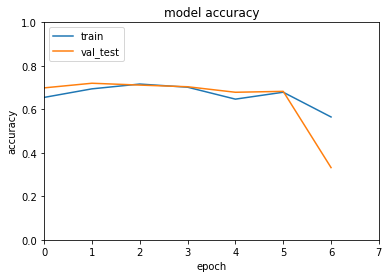

In [10]:
import matplotlib.pyplot as plt      #These provide matlab type of plotting functions
%matplotlib inline                   

    # list all data in history and print out performance
print(fit_history.history.keys())

# summarize history for accuracy
plt.figure()
plt.axis([0 ,len(fit_history.history['acc']), 0, 1])
plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_test'], loc='upper left')
plt.show()
plt.savefig("model_fit_history.png", bbox_inches='tight')


W3D shape Wlist[0]:(3, 3, 16)


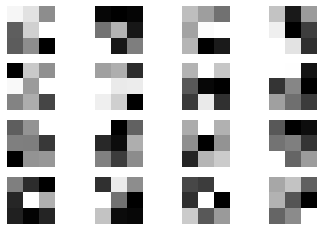

done plotting weights mosaic


<Figure size 432x288 with 0 Axes>

In [3]:
# ------------ GET WEIGHTS From Convolution Layer and make mosaic image 
Wlist   =my_model.layers[0].get_weights()      
W3D     =np.squeeze(Wlist[0])
print("W3D shape Wlist[0]:"+str(W3D.shape))
W3Dchan =W3D.swapaxes(1,2).swapaxes(0,1)  #get the channels as 1st dimension;

#plot mosaic of filters of 
ncol =4
nrow =np.ceil(16/ncol)   #assume 16 is number of filters
plt.figure()
for i in range(W3Dchan.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(W3Dchan[i],'gray')
   plt.axis('off')

plt.show()
plt.savefig("filter_mosaic.png", bbox_inches='tight')
print('done plotting weights mosaic')

In [4]:
#  ---------------- NOW Visualize the activations for the first training example --------
#   1. gather activations from the model layers
# -------------------------------------------------------------------------

layer_outputs     = [layer.output for layer in my_model.layers[:]]
my_model_actvtns  = tf.keras.models.Model(inputs=my_model.input, outputs=layer_outputs)
x                 = np.expand_dims(x_train[0],0)           #set up a 4D input of 1 image training set 
my_actvtns_output = my_model_actvtns.predict(x)   #for each image get predictions/activatns

print(str(len(my_actvtns_output))+ ' layers with output activations')



6 layers with output activations


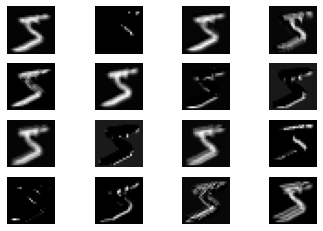

done plotting layer1 activation output mosaic


<Figure size 432x288 with 0 Axes>

In [5]:
# 2.  Now output a mosaic of layer 1
layeroutput3D      = np.squeeze(my_actvtns_output[0]) #<<---- -try different layer output     
ncol =4
nrow =np.ceil(16/ncol)
plt.figure()
for i in range(layeroutput3D.shape[2]):  
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(layeroutput3D[:,:,i],'gray')
   plt.axis('off')
plt.show()
plt.savefig("activation_mosaic.png", bbox_inches='tight')
print('done plotting layer1 activation output mosaic')
